# Here we assess the conditions that lead to an unstable drainage, based on the paper of Raymond & Nolan 2000 



1) Context

Walder and Costa (1996) modelled lake drainage throug an ice rock breach, and R&N have adapted their model to  supra-glacial lake, and introduced the concept of stable and unstable drainage. The latter is when channel floor is lowering (incision) faster than lake kevel. Their work is the base of further modelling studies (e.g Mayer and Schuler., 2005 ; Vincent et al., 2010 ; Kingslake et al., 2015). They show that a critical lake area exist above which drainage, when overtopping ice surface, is unstable. This criterion depends of lake temperature. Here we want to calculate this criterion by using our own dataset from Lac des Faverges drainage. 

**Scientific question:**

Is the criterion of R&N would have predict the stable drainage of Lac des Faverges in 2019 ?
Can we conduct a sensitivity study of parameters involved ? (toward hazard risk mitigation). 

2) Assumption made in R&N 2000

- linerar relationship between lake area $A_l$ and lake surface elevation $h_l$ (i.e triangle shape of lake geometry)
- shallow and wide water flow ($w >> h$) to write equation 3
- stream flow is limited by the discharge through the channel (play on the power of equation 3)
- critical flow ( Re > 4000)
- linear decrease of temperature along channel 
- energy to heat (potential and thermal) are transferred to channel floor uniformely (= only vertical erosion) over its length according to the average slope and rate of cooling (to avoid introducing heat equation to obtain actual water temperature in channel). 
- water inflow neglected (from lake side for ex.)

3) Equation 8 of R&N 2000:

$$ A_c =  \frac{\rho_i L w}{\rho_w g (\beta + \gamma)}$$

$A_c$ is the critical lake area above which unstable drainage occur. $\rho_i$ and $\rho_w$ are density of ice and water, $L$ latent heat of fusion, $w$ the width of the channel, and $\beta$ is the channel slope.

$$\gamma = \frac{C_w\Delta T}{g l}$$

with $\Delta T$ the lake temperature above 0°C, and $l$ the length where temperature $T$ drops to 0 (->linear decrease).  



In [1]:
using MonteCarloMeasurements, Distributions
using PyPlot
using LsqFit
using NBInclude
@nbinclude("helper-functions.ipynb");

## Plot R&N theory between P5 and P3

In [2]:
#Physical constant 
rhoi = 900
#rhow = 1000
L = 333000
Cw = 4180


#parameters from field measurements the 10 July

w = 2 ± 0.5 #width (m)

h5 = 1 ± 0.05; h3 = 0.23 ± 0.05
dh = h5 - h3
z5 = 2732.67 ± 0.1 ; z3 = 2732.57 ± 0.1#(see geometry notebook)
dz = z5 - z3
s = (dh + dz)/253 #slope 
l = 253 #(m), length where temperature drops to 0. Determined from a first visual inspection, but we can fit a linear law in our data to be more accurate.
T = 0:0.1:3 #lake temperature (at P5)
dT = 0.14 ± 0.05 #0.14° of decrease in general (see Fig. 7 in Paper). Rule of thumb...

#T = 0.5:0.1:3 #lake temperature (at P5)
#T3 = Particles(0.1,0.03)

gamma = Cw*(T .- dT)/(g*l)
Ac = (rhoi*L*w) ./ (rhow*g*(s .+ gamma)); #in m2
  



In [4]:
#slope in %
s*100

Particles{Float64,2000}
 0.343874 ± 0.0639

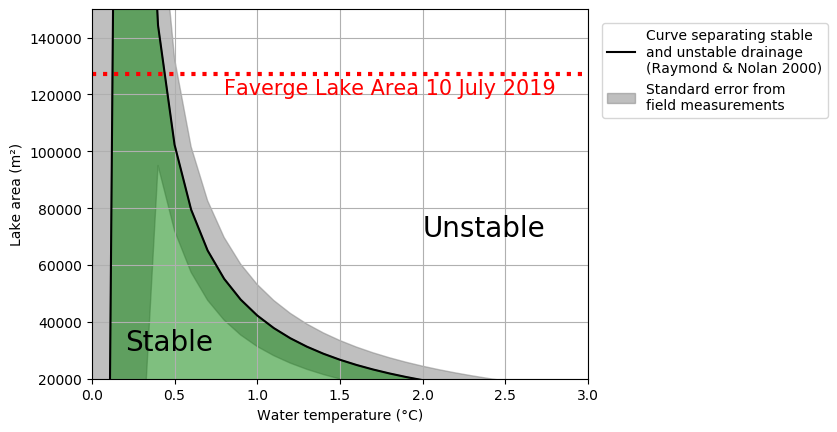

In [4]:
plot(T,mean.(Ac), color = "black", label="Curve separating stable 
and unstable drainage
(Raymond & Nolan 2000)")
fill_between(T, mean.(Ac) .- std.(Ac), mean.(Ac) .+ std.(Ac), alpha=0.5, color="grey",label="Standard error from 
field measurements")
stackplot(T,mean.(Ac), color="green",alpha=0.5)
ylabel("Lake area (m²)")
xlabel("Water temperature (°C)")
ylim(20000,150000)
xlim(0,3)
text(0.2,30000,"Stable", fontsize=20)
text(2,70000,"Unstable", fontsize=20)
axhline(y=127012,linewidth=3,linestyle="dotted",color="r")
#axvline(x=0.5,linewidth=3,linestyle="dotted",color="r")
text(0.8,120000,"Faverge Lake Area 10 July 2019", fontsize=15, color = "red")
grid(true)
legend(bbox_to_anchor=[1,1],loc=2,borderaxespad=1)
#savefig(path_plots*"RN_lake_area_theory.png",bbox_inches="tight") 

Lake area at drainage inititation was **127 012 m2** (that corresponds to an elevation of 2733.16m, according to the 2019 DEM, see `level_area_2019_DEM2019` in lake data folder.

## Sensitivity



The initial area of Lac des Faverges ($A_0$) was too large to be therotically stable according to R&N 2000. Note that this is true whatever the lake temperature, which was likely to be superior at 0°C and thus make the drainage even more unstable.

Consequently, the theory used here is wrong. -> Assumption have to be revisited

(Rough) sensitivty of parameters:

    $l$ doesn't play a major role
    $w$ and $\beta$ does, but are quit well constrained from field measurements

Note:

    The water inflow was neglected. High input from snow and ice melt would help a even more unstable drainage
    A linear relationship between lake elevation and area shouldn't be too far from reality. At least the decreasing area with elevation is true, and help to stabilize the drainage.



# Regarding assumptions: How far from reality are we ?

### Lake Bathymetry

The R&N theory assumes linear relation between elevation and lake area change (i.e triangular cross section profile). Here we show 4 cross section profile (ranked from left to right) of the lake from UAV flight conducted in September 2019.

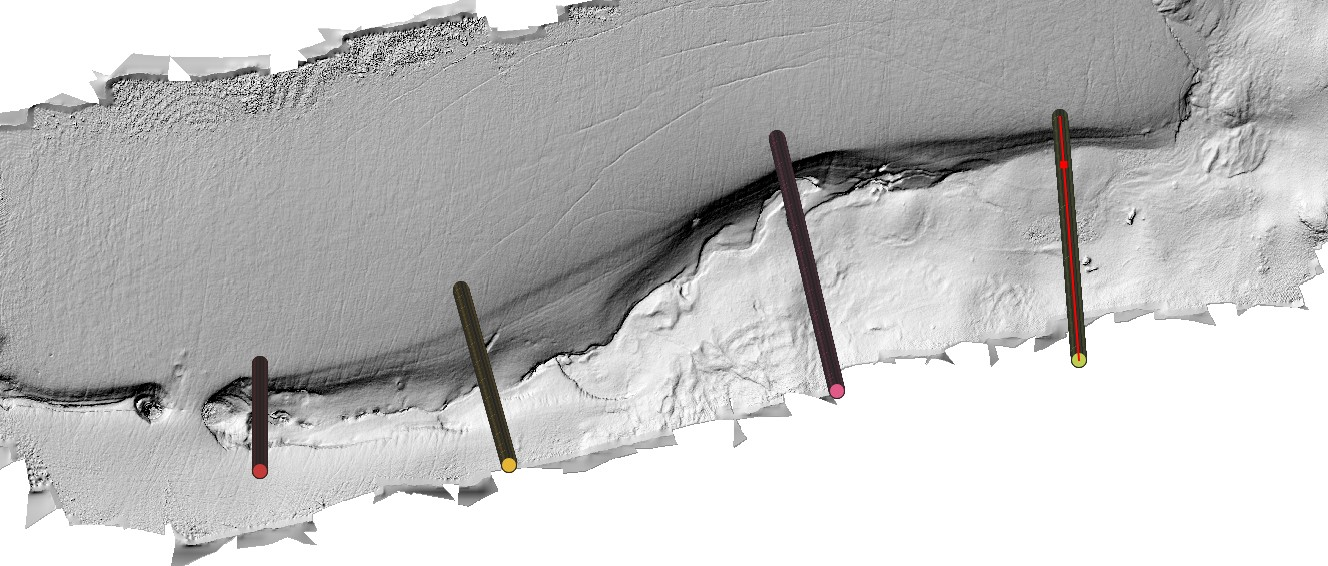

#### Download profile from CSV 

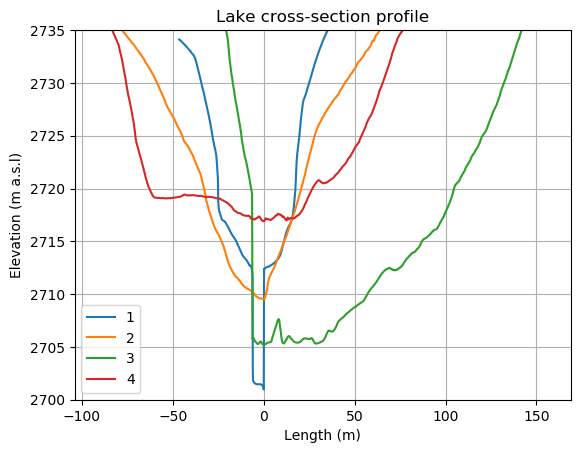

In [5]:
#profiles
for i in (1,2,3,4)
d = readdlm(path_lake*"lake_profile$i.csv" , ';', header=false);
x = d[:,1];
z = d[:,2];
    #to compare: set the minimum elevation at the same location
    i_min = argmin(z)
    x_min = x[i_min]
    x = x .- x_min
    
    
plot(x,z, label = "$i")
    legend()
end
grid(true)
title("Lake cross-section profile")
ylabel("Elevation (m a.s.l)")
xlabel("Length (m)")
ylim(2700,2735);

**Remarks**:
All profiles show a different pattern than the theory assumes, but the 3 (which is quite close to be triangular). The 1,2 and 4 present in facts a steeper slope than the theoretical linear one, which induce a lower decrease in lake area together with elevation in reality than in theory. This actual geometry prones a more unstable drainage (the steeper the slope is, the slowest the volume decrease with elevation, and the lake discharge stay high). Consequently,  a more realistic lake geometry could improve the R&N equation (8). 

### Hypsometry parametrization ($p_L$): See `Lake_data` notebook 



$$ \frac{h_L}{h_0}^{p_L} = \frac{V_L}{V_0} $$

with $V_0$ and $h_0$ are lake reference volume and depth at initial conditions.

Vertically walls are described by a parameter $p_L = 1$, bowl shaped lake by $1<p_L<3$, conic lake by $p_L = 3$ and lake shape lie a musical horn by $p_L>3$ (Clarke, 1982)

**We obtained $p_L = 2.80$, which means that a triangular lake shape is well suitable in our case**